<a href="https://colab.research.google.com/github/KondamPravalikaReddy/AirAware-Smart-Air-Quality-Prediction/blob/main/MileStone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install & Setup Kaggle API
!pip install kaggle -q

In [3]:
# Upload kaggle.json (from your Kaggle account → API → Create New Token)
from google.colab import files
files.upload()   # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravalikareddi","key":"cc23ca85e0877e600aaa326978d10bad"}'}

In [4]:
# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download Dataset
!kaggle datasets download -d fedesoriano/air-quality-data-set --unzip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set
License(s): copyright-authors
  0% 0.00/248k [00:00<?, ?B/s]
100% 248k/248k [00:00<00:00, 414MB/s]


In [6]:
# 3. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 4. Load Dataset
import pandas as pd
df = pd.read_csv("AirQuality.csv", delimiter=';', low_memory=False) # file name after unzip, added delimiter
print("Original Data:\n")
print(df.head())

Original Data:

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0 

In [12]:
# Data Cleaning

# Check null values
print("\nMissing Values:\n", df.isnull().sum())

# Define the columns to convert to numeric
numeric_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Convert relevant columns to numeric, coercing errors to NaN
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Example: fill numeric columns with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Example: fill categorical/text columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert Date and Time columns to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Combine Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check null values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values:
 Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


/tmp/ipython-input-53430477.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')



Missing Values After Cleaning:
 Date             5755
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)         9353
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9353
Unnamed: 16      9353
DateTime         9353
dtype: int64


In [13]:
#  Basic Overview
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe())


Shape: (9353, 18)

Data Types:
 Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Unnamed: 15             float64
Unnamed: 16             float64
DateTime         datetime64[ns]
dtype: object

Summary Stats:
                                 Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           3598  9353.000000  9353.000000  9353.000000   
mean   2004-09-25 10:57:33.918843904  -148.423023  1049.657756  -159.068223   
min              2004-01-04 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-05-05 00:00:00  -148.4

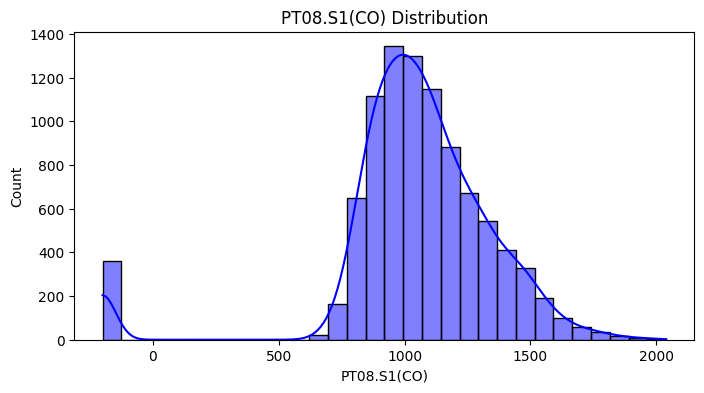

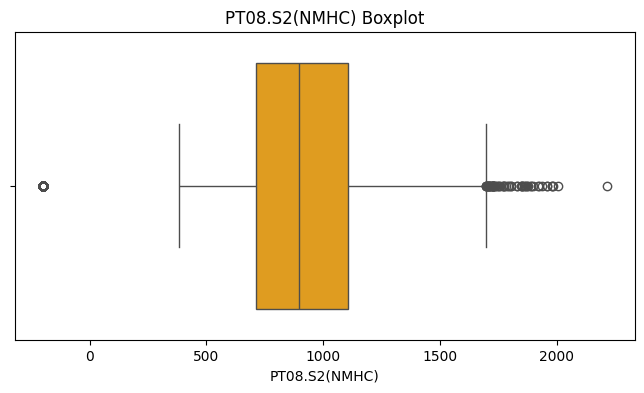

In [15]:
#  Univariate Analysis
plt.figure(figsize=(8,4))
sns.histplot(df["PT08.S1(CO)"], kde=True, color="blue", bins=30)
plt.title("PT08.S1(CO) Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["PT08.S2(NMHC)"], color="orange")
plt.title("PT08.S2(NMHC) Boxplot")
plt.show()

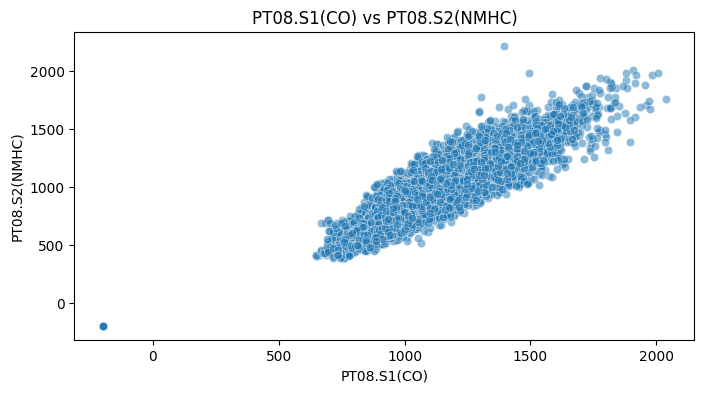

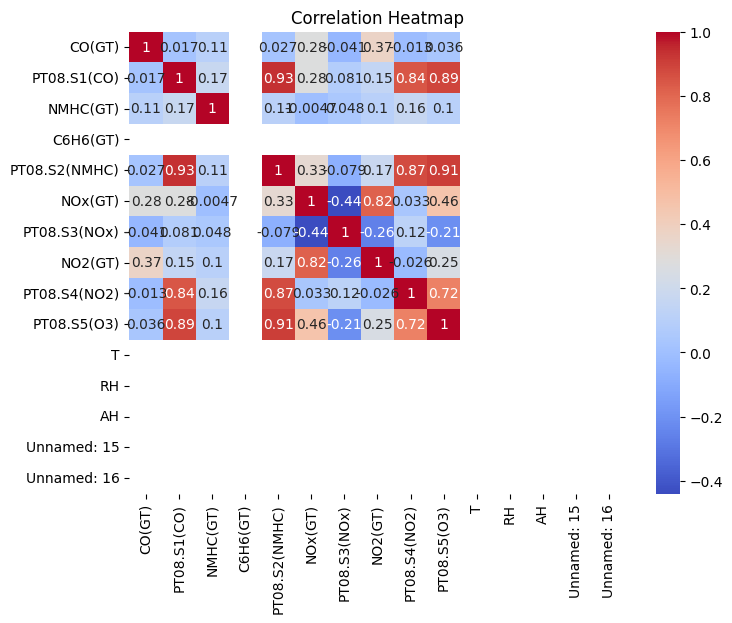

In [17]:
#  Bivariate Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x="PT08.S1(CO)", y="PT08.S2(NMHC)", data=df, alpha=0.5)
plt.title("PT08.S1(CO) vs PT08.S2(NMHC)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

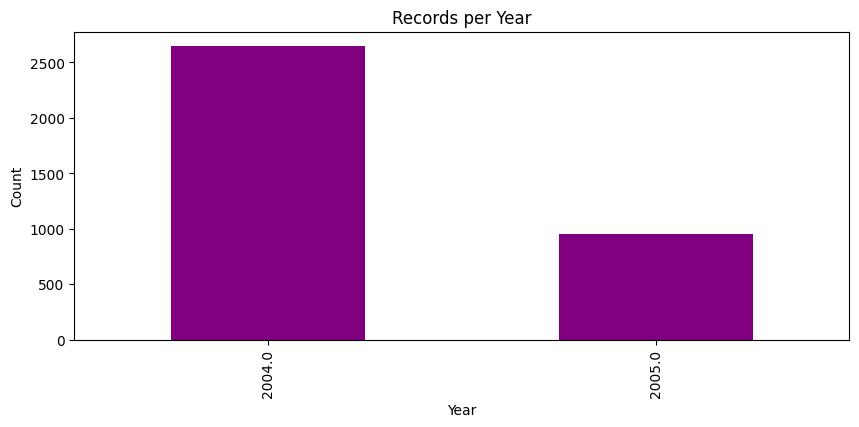

In [19]:
#  Date-Time Analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

plt.figure(figsize=(10,4))
df["Year"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

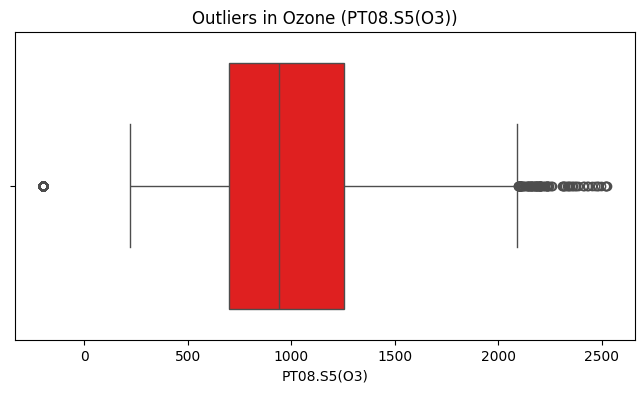

In [21]:
#  Outlier Detection
plt.figure(figsize=(8,4))
sns.boxplot(x=df["PT08.S5(O3)"], color="red")
plt.title("Outliers in Ozone (PT08.S5(O3))")
plt.show()

In [22]:
#  Save Cleaned Dataset
df.to_csv(" AirQuality_cleaned.csv", index=False)
print("\n Cleaned & EDA-ready dataset saved as 'AirQuality_cleaned.csv'")


 Cleaned & EDA-ready dataset saved as 'AirQuality_cleaned.csv'


In [ ]:
# ==================== END OF MILESTONE 1 TASK ===============================================

In [23]:
#  Setup: Install and Import Libraries

!pip install kaggle -q
!pip install xgboost -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [27]:
#  Load the Dataset

df = pd.read_csv("AirQuality.csv", delimiter=';', low_memory=False) # Specify semicolon delimiter
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

 Dataset Loaded Successfully!
Shape: (9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [28]:
#  Basic Info and Missing Values

print("\n--- Basic Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory

In [31]:
#  Data Cleaning

# Convert relevant columns to numeric
numeric_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
for col in numeric_cols:
    # Replace ',' with '.' for decimal conversion in relevant columns
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Fill missing numeric values with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Data Cleaning Done!")


 Data Cleaning Done!



--- Statistical Summary ---
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9471.000000  9471.000000  9471.000000  9471.000000    9471.000000   
mean    -36.203125  1048.990061  -159.090093    -0.564122     894.595276   
std      79.277658   327.841433   138.945154    46.651368     340.266507   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   923.000000  -200.000000     3.900000     713.000000   
50%       1.500000  1050.000000  -200.000000     7.800000     894.595276   
75%       2.600000  1218.000000  -200.000000    13.500000    1102.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9471.000000   9471.000000  9471.000000   9471.000000  9471.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     255.879678    320.049602   126.174086    464.38946

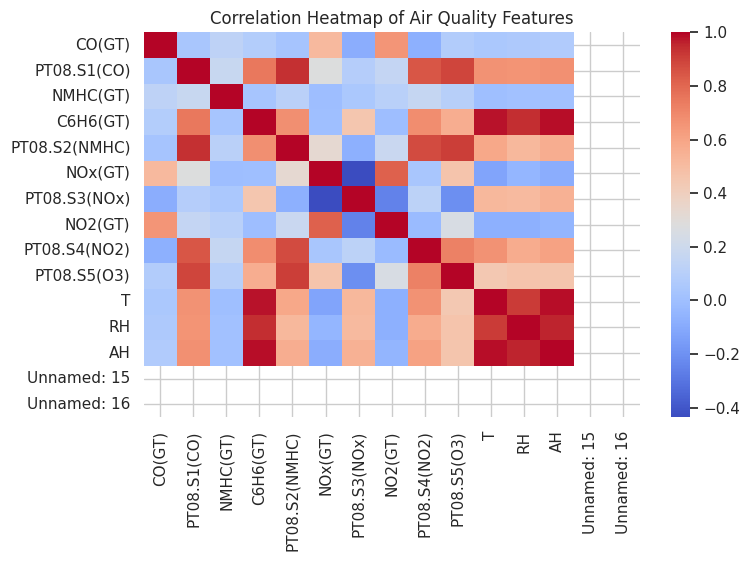

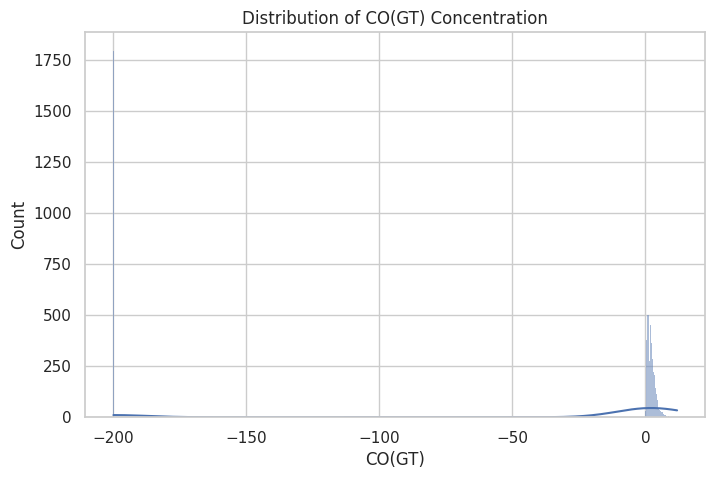

In [33]:
#  Exploratory Data Analysis (EDA)

print("\n--- Statistical Summary ---")
print(df.describe())

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

# Distribution of a relevant column (e.g., CO(GT))
if 'CO(GT)' in df.columns:
    sns.histplot(df['CO(GT)'], kde=True)
    plt.title("Distribution of CO(GT) Concentration")
    plt.show()

In [34]:
# Convert Categorical to Numerical

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("Converted Categorical Columns to Numeric")

Converted Categorical Columns to Numeric


In [36]:
#  Feature Selection
target_col = 'CO(GT)'

# Remove the 'Unnamed' columns as they are empty
X = df.drop([target_col, 'Unnamed: 15', 'Unnamed: 16'], axis=1)
y = df[target_col]

# Handle potential infinite values before scaling
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Target variable set to: {target_col}")
print("Features scaled.")

Target variable set to: CO(GT)
Features scaled.


In [37]:
#  Split Data into Train/Test

# Take a smaller random sample for faster exploration (e.g., 100000 rows)
sample_size = 20
df_sampled = df.sample(n=min(sample_size, len(df)), random_state=42)

target_col = 'CO(GT)'

X_sampled = df_sampled.drop([target_col, 'Unnamed: 15', 'Unnamed: 16'], axis=1)
y_sampled = df_sampled[target_col]


# Handle potential infinite values before scaling
X_sampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_sampled.fillna(X_sampled.mean(), inplace=True)

# Scale features using the scaler fitted on the full dataset or a subset of the full dataset.
# For now, we will fit a new scaler on the sampled data for speed.
scaler_sampled = StandardScaler()
X_scaled_sampled = scaler_sampled.fit_transform(X_sampled)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_sampled, y_sampled, test_size=0.2, random_state=42
)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Training Samples: 16, Testing Samples: 4


In [38]:
#  Model Training & Evaluation

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, rmse])
    print(f"\n {name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")


 Random Forest Results:
R² Score: -0.0349
MAE: 64.7975
RMSE: 89.1079

 XGBoost Results:
R² Score: 0.2747
MAE: 38.0646
RMSE: 74.5960




 Model Comparison:
           Model  R2 Score        MAE       RMSE
0  Random Forest -0.034915  64.797500  89.107883
1        XGBoost  0.274724  38.064558  74.595992


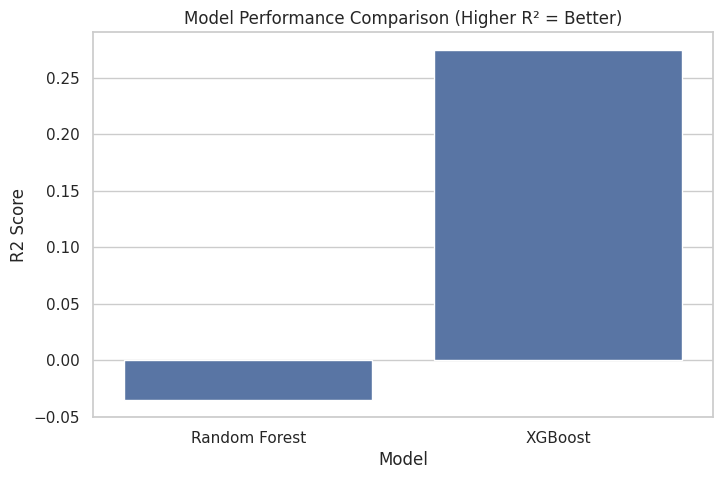

In [39]:
# Compare Models

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "RMSE"])
print("\n\n Model Comparison:")
print(results_df)

sns.barplot(data=results_df, x="Model", y="R2 Score")
plt.title("Model Performance Comparison (Higher R² = Better)")
plt.show()

In [ ]:
# StandardScaler : It ensures all numerical features contribute equally to distance-based learning.
# Heatmap : Heatmap shows correlations between pollutants (e.g., PM2.5 vs O3), which is vital for feature understanding.
# Histogram : visualize distribution and relationships in environmental data.
# RandomForestRegressor : Robust, non-linear, handles missing values, resistant to overfitting, performs well on tabular environmental data.
# XGBoostRegressor : Gradient-boosting ensemble that gives high accuracy and handles large feature spaces efficiently.
# Evaluation Metrics :
# R² Score — Measures model's explanatory power (how much variance is captured).
# MAE & RMSE — Show average prediction errors; RMSE penalizes large deviations more.
# These three give a balanced view of accuracy and stability.